# Enhanced Graph Implementation Notes

This notebook provides detailed notes on graph implementations, focusing on **Adjacency Matrix** and **Adjacency List** methods. We use Python with Matplotlib and NetworkX to create extensive visualizations, including graph structures, adjacency matrices, and adjacency lists. C++ code samples are included for both implementations. Visualizations are maximized to aid understanding of graph concepts.

## 1. Graph Basics

Graphs consist of **nodes** (vertices) and **edges** (connections). Since standard libraries (C++ STL, Python) lack built-in graph structures, developers must implement them. The primary goal is to store node connections efficiently.

**Two Main Representations**:
- **Adjacency Matrix**: A 2D matrix where entries indicate edges between nodes.
- **Adjacency List**: A map where each node maps to a list of its neighbors.

Let's visualize a sample undirected graph.

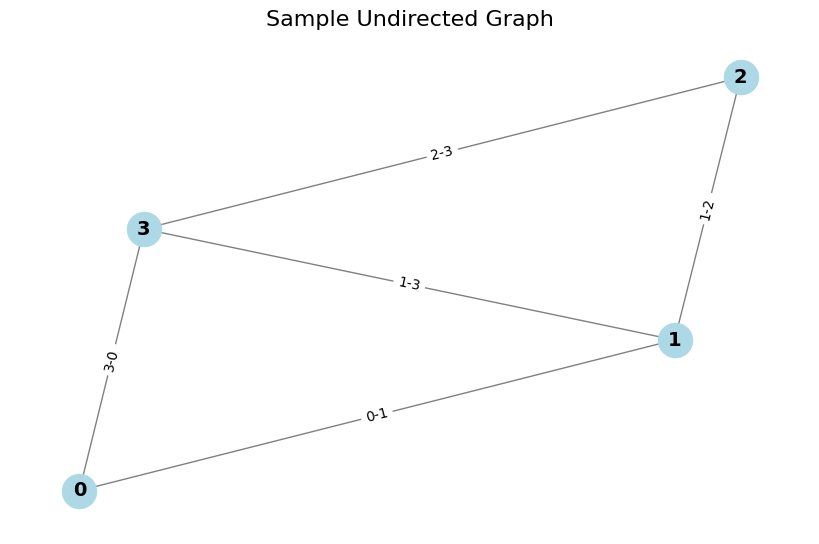

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()
edges = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)]
G.add_edges_from(edges)

# Visualize
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=600, 
        font_size=14, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{u}-{v}' for u, v in edges}, font_size=10)
plt.title('Sample Undirected Graph', fontsize=16)
plt.show()


## 2. Adjacency Matrix

### Concept
- A matrix of size $N \times N$ for $N$ nodes.
- $[i][j] = 1$ if an edge exists from node $i$ to $j$; else 0.
- **Undirected**: $[i][j] = [j][i] = 1$.
- **Directed**: $[i][j] = 1$ for $i\to j$; else 0.
- Self-loops ($[i][i]$) are typically 0.
- **Pros**: Fast edge lookup.
- **Cons**: Memory-intensive for sparse graphs.

### Python Visualization (Heatmap)

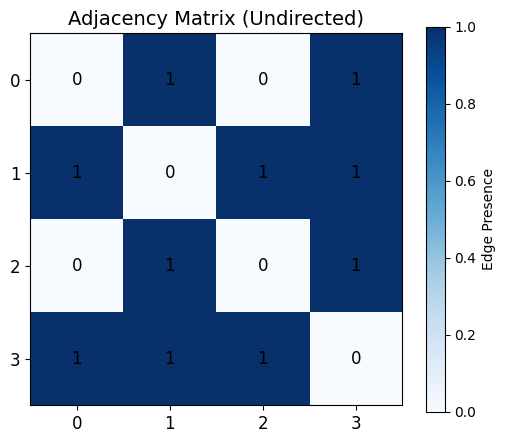

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define nodes and edges
n = 4
edges = [(0,1), (1,2), (2,3), (3,0), (1,3)]

# Build undirected adjacency matrix
adj_matrix = np.zeros((n,n), dtype=int)
for u,v in edges:
    adj_matrix[u,v] = 1
    adj_matrix[v,u] = 1

# Plot heatmap
plt.figure(figsize=(6,5))
plt.imshow(adj_matrix, cmap='Blues', interpolation='none')
plt.colorbar(label='Edge Presence')
plt.xticks(np.arange(n), [str(i) for i in range(n)], fontsize=12)
plt.yticks(np.arange(n), [str(i) for i in range(n)], fontsize=12)
plt.title('Adjacency Matrix (Undirected)', fontsize=14)

# Annotate
for i in range(n):
    for j in range(n):
        plt.text(j, i, adj_matrix[i,j], ha='center', va='center', color='black', fontsize=12)
plt.show()


### C++ Implementation (Adjacency Matrix)
```cpp
#include <vector>
#include <iostream>
using namespace std;

class GraphMatrix {
    int numNodes;
    vector<vector<int>> adjMatrix;
public:
    GraphMatrix(int n): numNodes(n), adjMatrix(n, vector<int>(n,0)) {}
    void addEdge(int u, int v, bool directed=false) {
        adjMatrix[u][v]=1;
        if(!directed) adjMatrix[v][u]=1;
    }
    void printMatrix() const {
        cout<<"Adjacency Matrix:\n";
        for(int i=0;i<numNodes;++i){
            for(int j=0;j<numNodes;++j) cout<<adjMatrix[i][j]<<" ";
            cout<<"\n";
        }
    }
};

int main(){
    GraphMatrix g(4);
    g.addEdge(0,1);
    g.addEdge(1,2);
    g.addEdge(2,3);
    g.addEdge(3,0);
    g.addEdge(1,3);
    g.printMatrix();
    return 0;
}
```

## 3. Adjacency List

### Concept
- A map where each node maps to a list of its neighbors.
- **Pros**: Memory-efficient for sparse graphs.
- **Cons**: Slower edge lookup than matrix.

### Python Visualization

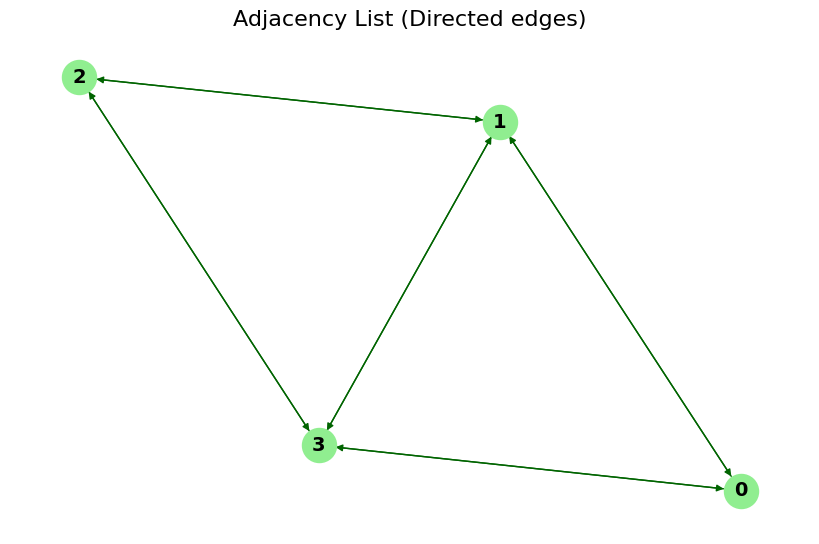

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Build directed graph from adjacency list
adj_list = {0:[1,3],1:[0,2,3],2:[1,3],3:[0,1,2]}
G = nx.DiGraph()
for u,nbrs in adj_list.items():
    for v in nbrs:
        G.add_edge(u,v)

# Plot
plt.figure(figsize=(8,5))
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True, node_color='lightgreen', node_size=600,
        font_size=14,font_weight='bold', edge_color='darkgreen', arrows=True)
plt.title('Adjacency List (Directed edges)', fontsize=16)
plt.show()


### C++ Implementation (Adjacency List)
```cpp
#include <unordered_map>
#include <vector>
#include <iostream>
using namespace std;

class GraphList {
    unordered_map<int, vector<int>> adj;
public:
    void addEdge(int u,int v,bool directed=false){
        adj[u].push_back(v);
        if(!directed) adj[v].push_back(u);
    }
    void printList() const {
        cout<<"Adjacency List:\n";
        for(auto&p:adj){ cout<<p.first<<"-> "; for(int v:p.second) cout<<v<<" "; cout<<"\n";} }
};

int main(){
    GraphList g;
    g.addEdge(0,1);
    g.addEdge(1,2);
    g.addEdge(2,3);
    g.addEdge(3,0);
    g.addEdge(1,3);
    g.printList();
    return 0;
}
```

## 4. Directed Graphs

### Visualization & Matrix

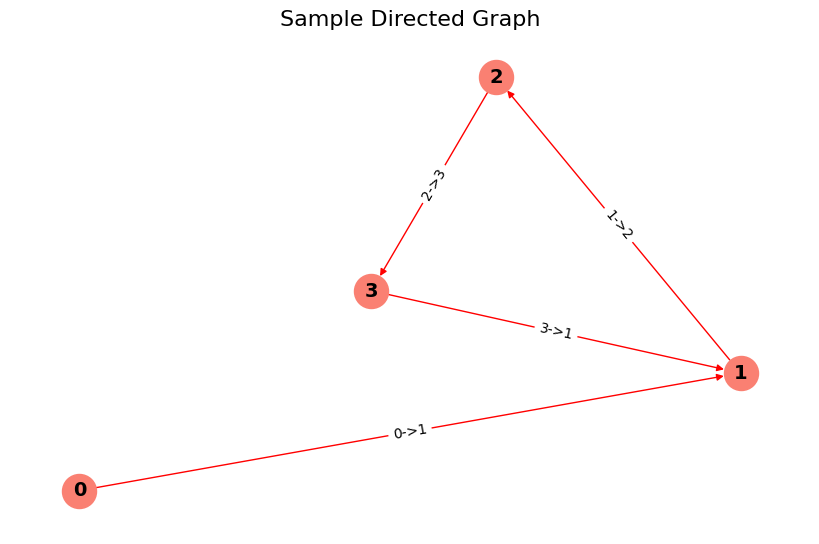

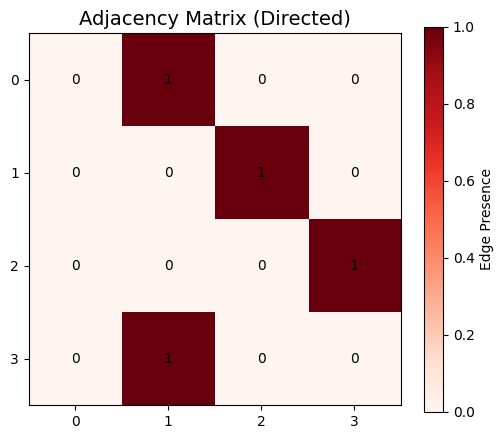

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Directed graph edges
dir_edges = [(0,1),(1,2),(2,3),(3,1)]
G_dir = nx.DiGraph()
G_dir.add_edges_from(dir_edges)

# Plot graph
plt.figure(figsize=(8,5))
pos = nx.spring_layout(G_dir)
nx.draw(G_dir,pos,with_labels=True,node_color='salmon',node_size=600,
        font_size=14,font_weight='bold',edge_color='red',arrows=True)
nx.draw_networkx_edge_labels(G_dir,pos,edge_labels={(u,v):f'{u}->{v}' for u,v in dir_edges},font_size=10)
plt.title('Sample Directed Graph', fontsize=16)
plt.show()

# Build & plot adjacency matrix
n=4
adj_mat_dir = np.zeros((n,n),dtype=int)
for u,v in dir_edges:
    adj_mat_dir[u,v]=1

plt.figure(figsize=(6,5))
plt.imshow(adj_mat_dir,cmap='Reds',interpolation='none')
plt.colorbar(label='Edge Presence')
plt.xticks(range(n),[str(i) for i in range(n)])
plt.yticks(range(n),[str(i) for i in range(n)])
plt.title('Adjacency Matrix (Directed)', fontsize=14)
for i in range(n):
    for j in range(n):
        plt.text(j,i,adj_mat_dir[i,j],ha='center',va='center')
plt.show()


## 5. Edge List Processing

### C++ Implementation
```cpp
#include <vector>
#include <unordered_map>
#include <iostream>
using namespace std;

class GraphEdgeList {
    unordered_map<int, vector<int>> adj;
public:
    void build(const vector<vector<int>>& edges,bool directed=false){
        for(auto&e:edges){ adj[e[0]].push_back(e[1]); if(!directed) adj[e[1]].push_back(e[0]); }
    }
    void print() const { cout<<"Adj List from Edge List:\n"; for(auto&p:adj){ cout<<p.first<<"-> "; for(int v:p.second) cout<<v<<" "; cout<<"\n";} }
};

int main(){
    vector<vector<int>> edges={{0,1},{1,2},{2,3},{3,0},{1,3}};
    GraphEdgeList g; g.build(edges);
    g.print();
    return 0;
}
```

### Python Visualization from Edge List

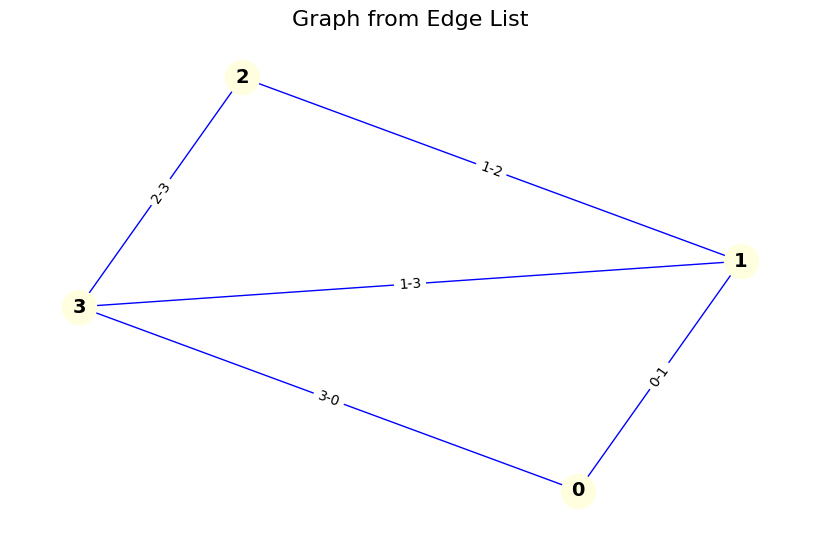

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

edge_list = [(0,1),(1,2),(2,3),(3,0),(1,3)]
G_edge = nx.Graph()
G_edge.add_edges_from(edge_list)

plt.figure(figsize=(8,5))
pos = nx.spring_layout(G_edge)
nx.draw(G_edge,pos,with_labels=True,node_color='lightyellow',node_size=600,
        font_size=14,font_weight='bold',edge_color='blue')
nx.draw_networkx_edge_labels(G_edge,pos,edge_labels={(u,v):f'{u}-{v}' for u,v in edge_list},font_size=10)
plt.title('Graph from Edge List', fontsize=16)
plt.show()


## 6. Memory Usage Comparison

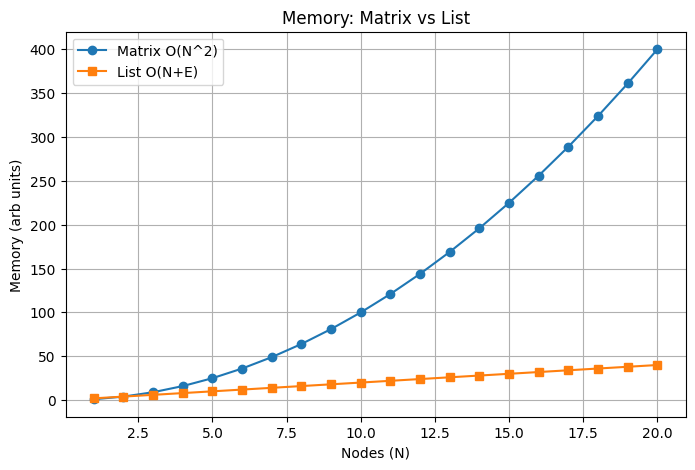

In [12]:
import numpy as np
import matplotlib.pyplot as plt

nodes = np.arange(1,21)
matrix_mem = nodes**2
list_mem   = nodes*2

plt.figure(figsize=(8,5))
plt.plot(nodes, matrix_mem, marker='o', label='Matrix O(N^2)')
plt.plot(nodes, list_mem,   marker='s', label='List O(N+E)')
plt.xlabel('Nodes (N)')
plt.ylabel('Memory (arb units)')
plt.title('Memory: Matrix vs List')
plt.legend(); plt.grid(True)
plt.show()


## 7. Summary

- **Adjacency Matrix**: Fast lookup, heavy memory.
- **Adjacency List**: Memory-efficient, flexible.
- **Edge List**: Convert to matrix/list for algorithms.
- Visuals help understand structures and differences.